# **Calibration process of the ABALONE**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import scipy.integrate as integ
from scipy.optimize import curve_fit
import simulation_utility as su
import experimental_utility as eu
from numpy import mean
import time
import json
import os
import math

## Simulation

Simulation of a photons hits with different energies

../data/calibration/SiPM_readout_1_0_run_0.txt
../data/calibration/SiPM_readout_1_0_run_1.txt
Number of waveforms 38, time to read 0.03


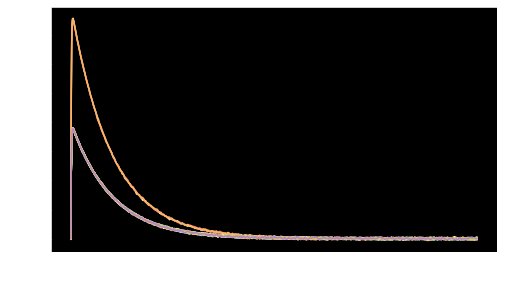

In [8]:
#Read data and show pulses
#Use "../data/calibration", or "/path_to_simulation/ABALONE/ABALONE_GEANT4/results/SiPM"
wfs_pe=su.read_waveforms_from_json(path='../data/calibration', spec='', plot=True)

In [9]:
#Calculate areas and integrals
int_pe=su.calculate_integrals(wfs_pe, nn=0, inf=1000, sup=1500, plot=0, calc_int=1)

Total events: 38
956


n. events: 38
Max= 14 , Position= 84.0


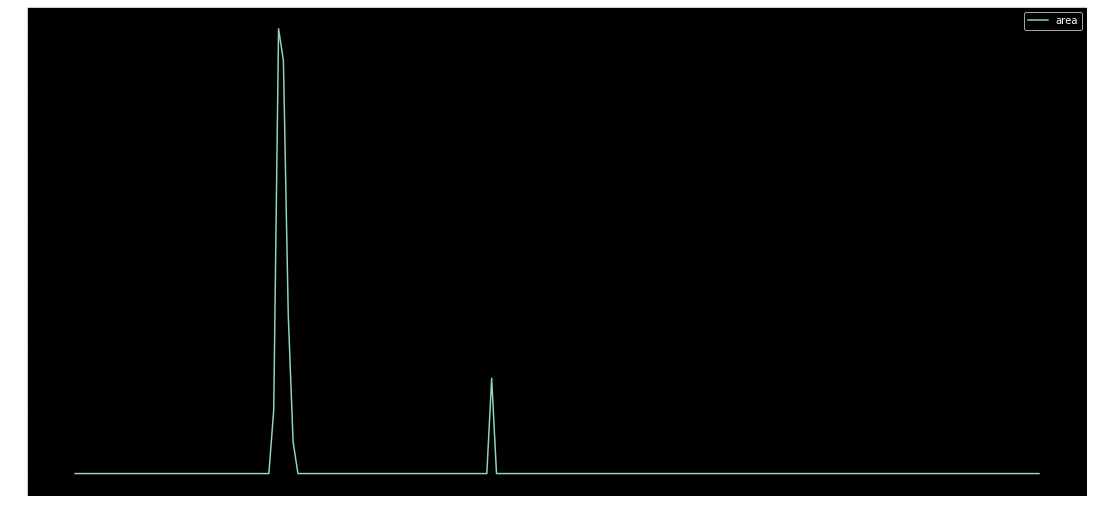

In [10]:
#Plot the area/integral spectrum
su.plot_area(int_pe['area'],int_pe['integral'], xrange=(0,400), bins=200,log=0)

## Experimental

### Calibration process for 30V

In [2]:
#File loading
dataRef=eu.read_file(filename='/home/abalone-data/calibration/data_noT/2022_06_07_T1025_ABALONE_0kV_SiPM2_30V_thr30_Ref_noT.dat', samples=1024)
dataAm=eu.read_file(filename='/home/abalone-data/calibration/data_noT/2022_06_07_T1111_ABALONE_0kV_SiPM2_30V_thr30_Am_noT.dat', samples=1024)
dataBa=eu.read_file(filename='/home/abalone-data/calibration/data_noT/2022_06_07_T1211_ABALONE_0kV_SiPM2_30V_thr30_Ba_noT.dat', samples=1024)

In [3]:
#Area acquisition
areaRef=eu.area(dataRef); areaAm=eu.area(dataAm); areaBa=eu.area(dataBa)
#areaRef

Number of events:  92444
Number of samples (10ns intervals):  1024
Maximum research interval: [ 0 , 1024 ]
Unable to determine the integral limit b for waveform:  13297
Unable to determine the integral limit b for waveform:  13606
Unable to determine the integral limit b for waveform:  83434
Number of events:  149178
Number of samples (10ns intervals):  1024
Maximum research interval: [ 0 , 1024 ]
Unable to determine the integral limit b for waveform:  26327
Unable to determine the integral limit b for waveform:  33516
Unable to determine the integral limit b for waveform:  62639
Unable to determine the integral limit b for waveform:  66630
Unable to determine the integral limit b for waveform:  103627
Unable to determine the integral limit b for waveform:  126066
Unable to determine the integral limit b for waveform:  134026
Number of events:  176943
Number of samples (10ns intervals):  1024
Maximum research interval: [ 0 , 1024 ]
Unable to determine the integral limit b for waveform:

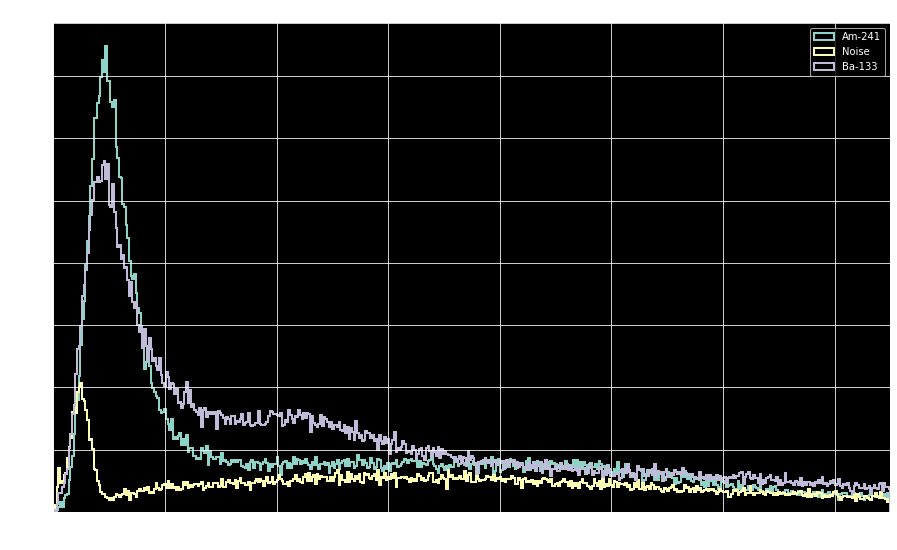

In [4]:
#Area histogram
area_space=np.linspace(0,15000,500)
plt.figure(figsize=(15,9))

hist_Am=plt.hist(areaAm['area'],bins=area_space,histtype='step',lw=2,density=False, label='Am-241')
hist_Ref=plt.hist(areaRef['area'],bins=area_space,histtype='step',lw=2,density=False, label='Noise')
hist_Ba=plt.hist(areaBa['area'],bins=area_space,histtype='step',lw=2,density=False, label='Ba-133')

#plt.yscale('log')
plt.xlim(0,15000)
plt.legend()
plt.ylabel('Counts'); plt.xlabel('Channel')
plt.title('Area histogram for 30V')
plt.grid(True)
plt.show()

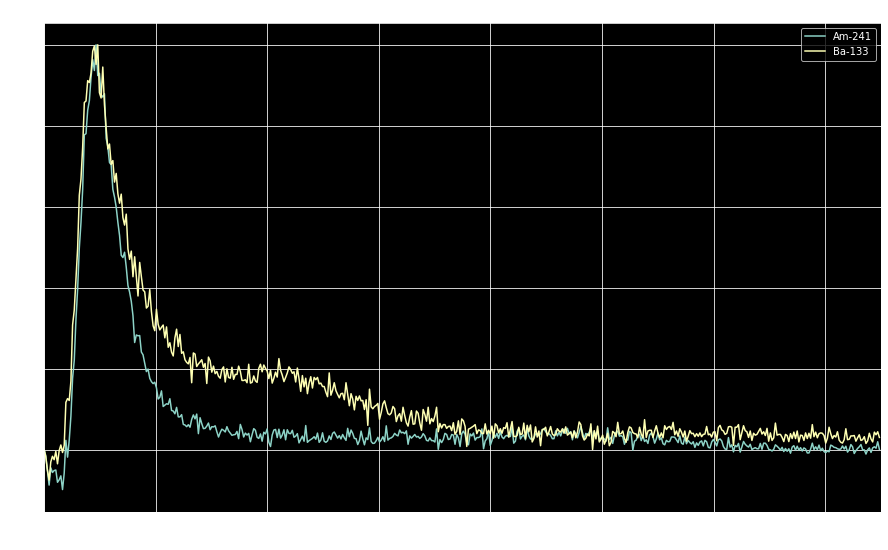

In [6]:
#normalized histogram with noise removed
area_space=np.linspace(0,15000,500)
plt.figure(figsize=(15,9))

hist_Am_diff=np.subtract(hist_Am[0], hist_Ref[0])
hist_Ba_diff=np.subtract(hist_Ba[0], hist_Ref[0])

#normalize against the maximum to avoid the dependance of activity
norm_Am=[float(i)/max(hist_Am_diff) for i in hist_Am_diff]
norm_Ba=[float(i)/max(hist_Ba_diff) for i in hist_Ba_diff]

#plt.yscale('log')
plt.xlim(0,15000)
plt.ylabel('Counts'); plt.xlabel('Channel')
plt.title('Normalized area histogram for 30V without noise')
plt.grid(True)
plt.plot(hist_Am[1][:-1], norm_Am, label="Am-241"); plt.plot(hist_Ba[1][:-1], norm_Ba, label="Ba-133")
plt.legend()
plt.show()

### Calibration process for 32V

In [32]:
#File loading
dataRef=eu.read_file(filename='/home/abalone-data/calibration/data_noT/2022_06_07_T1309_ABALONE_0kV_SiPM2_32V_thr100_Ref_noT.dat', samples=1024)
dataAm=eu.read_file(filename='/home/abalone-data/calibration/data_noT/2022_06_07_T1403_ABALONE_0kV_SiPM2_32V_thr100_Ref_Am_noT.dat', samples=1024)
dataBa=eu.read_file(filename='/home/abalone-data/calibration/data_noT/2022_06_07_T1441_ABALONE_0kV_SiPM2_32V_thr100_Ref_Ba_noT.dat', samples=1024)

In [33]:
#Area acquisition
areaRef=eu.area(dataRef); areaAm=eu.area(dataAm); areaBa=eu.area(dataBa)
#areaRef

Number of events:  88252
Number of samples (10ns intervals):  1024
Maximum research interval: [ 0 , 1024 ]
Number of events:  141209
Number of samples (10ns intervals):  1024
Maximum research interval: [ 0 , 1024 ]
Unable to determine the integral limit b for waveform:  15701
Unable to determine the integral limit b for waveform:  24033
Unable to determine the integral limit b for waveform:  52306
Unable to determine the integral limit b for waveform:  98678
Unable to determine the integral limit b for waveform:  131900
Number of events:  190845
Number of samples (10ns intervals):  1024
Maximum research interval: [ 0 , 1024 ]
Unable to determine the integral limit b for waveform:  10277
Unable to determine the integral limit b for waveform:  11741
Unable to determine the integral limit b for waveform:  15910
Unable to determine the integral limit b for waveform:  27314
Unable to determine the integral limit b for waveform:  38577
Unable to determine the integral limit b for waveform:  

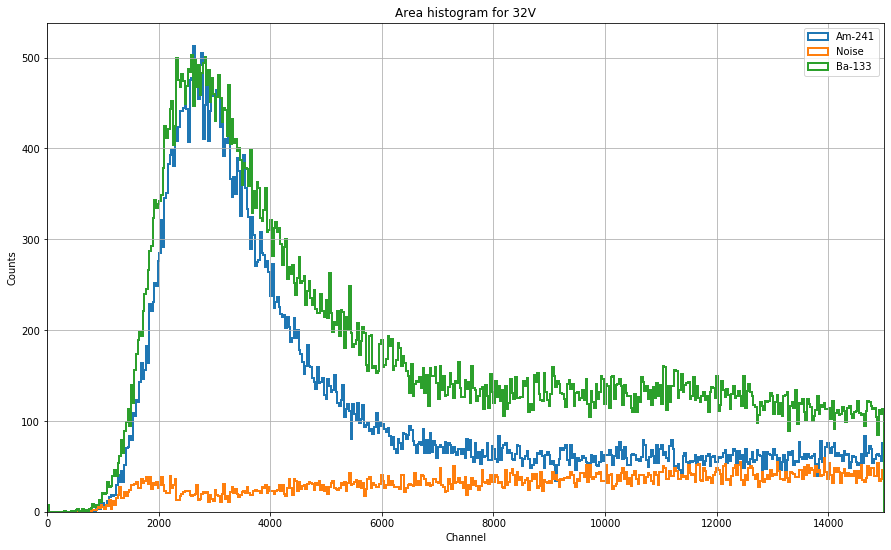

In [38]:
#Area histogram
area_space=np.linspace(0,15000,500)
plt.figure(figsize=(15,9))

hist_Am=plt.hist(areaAm['area'],bins=area_space,histtype='step',lw=2,density=False, label='Am-241')
hist_Ref=plt.hist(areaRef['area'],bins=area_space,histtype='step',lw=2,density=False, label='Noise')
hist_Ba=plt.hist(areaBa['area'],bins=area_space,histtype='step',lw=2,density=False, label='Ba-133')

#plt.yscale('log')
plt.xlim(0,15000)
plt.legend()
plt.ylabel('Counts'); plt.xlabel('Channel')
plt.title('Area histogram for 32V')
plt.grid(True)
plt.show()

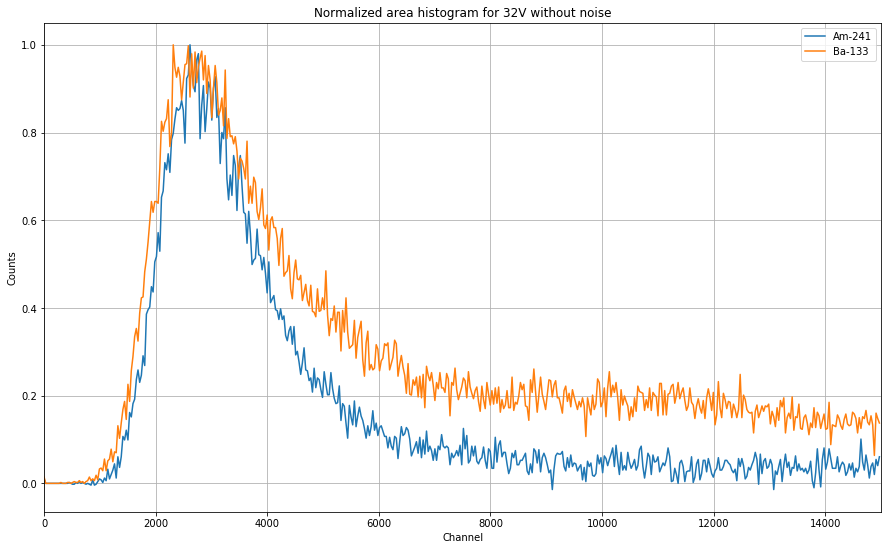

In [41]:
#normalized histogram with noise removed
area_space=np.linspace(0,15000,500)
plt.figure(figsize=(15,9))

hist_Am_diff=np.subtract(hist_Am[0], hist_Ref[0])
hist_Ba_diff=np.subtract(hist_Ba[0], hist_Ref[0])

norm_Am=[float(i)/max(hist_Am_diff) for i in hist_Am_diff] #normalize against the maximum
norm_Ba=[float(i)/max(hist_Ba_diff) for i in hist_Ba_diff] #normalize against the maximum to avoid the dependance of activity

#plt.yscale('log')
plt.xlim(0,15000)
plt.ylabel('Counts'); plt.xlabel('Channel')
plt.title('Normalized area histogram for 32V without noise')
plt.grid(True)
plt.plot(hist_Am[1][:-1], norm_Am2, label="Am-241"); plt.plot(hist_Ba[1][:-1], norm_Ba, label="Ba-133")
plt.legend()
plt.show()

### Parameters plotting

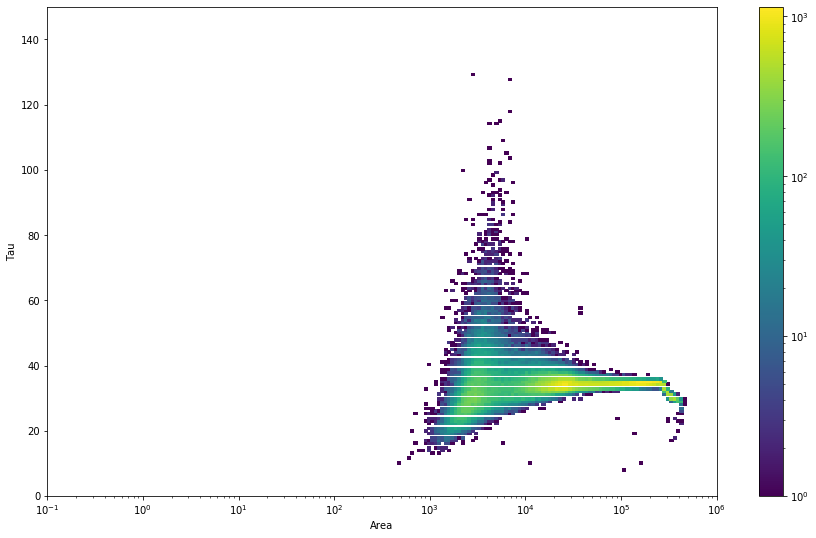

In [42]:
#tau-area plot
area_space = np.logspace(-1,6,200)
tau_space = np.linspace(0,150,200)
plt.figure(figsize=(15,9))

plt.hist2d(areaAm['area'],areaAm['tau'],bins=(area_space,tau_space),norm=matplotlib.colors.LogNorm())
#plt.axhline(y=70, color='red')
#plt.axhline(y=3, color='red')
plt.xscale('log')
plt.xlabel('Area')
plt.ylabel('Tau')

plt.colorbar()

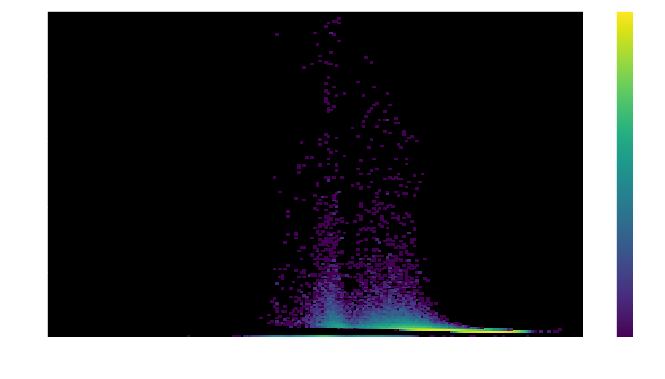

In [67]:
#grafico 2d entropia-area
area_space = np.logspace(-1,6,200)
ent_space = np.linspace(0,100,200)
plt.figure(figsize=(12,6))

plt.hist2d(areaRef['area'],areaRef['entropy'],bins=(area_space,ent_space),norm=matplotlib.colors.LogNorm())
plt.xscale('log')

plt.xlabel('scala logaritmica - area')
plt.ylabel('scala lieare - entropy')

plt.colorbar()

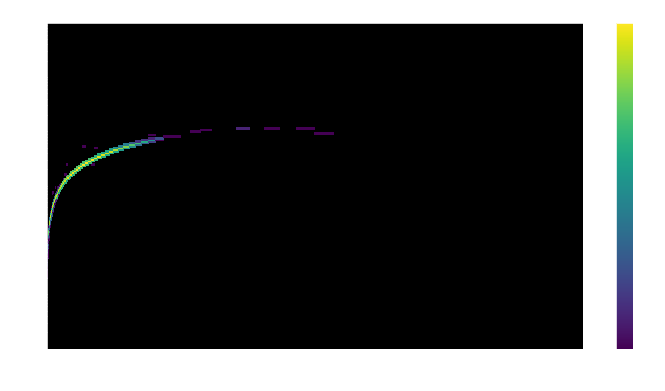

In [68]:
#plot maximum amplitude-Area
area_space = np.logspace(0,6,200)
max_space = np.logspace(0,6,200)
plt.figure(figsize=(12,6))
plt.hist2d(areaRef['area'],areaRef['wf_max'],bins=(area_space,max_space),norm=matplotlib.colors.LogNorm())
plt.yscale('log')
plt.xlabel('area (ADC x $\mu$s)')
plt.ylabel('Maximum amplitude')
plt.title('Maximum amplitude/Area')
plt.colorbar()